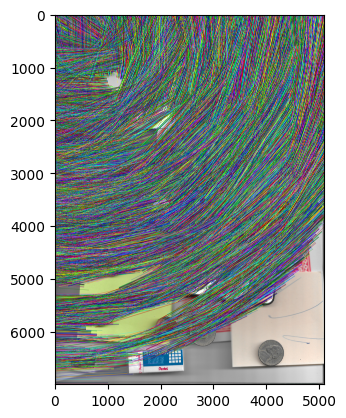

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('img/Problema2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
edges1 = cv2.Canny(gray1, 50, 150, apertureSize=3)
lines1 = cv2.HoughLines(edges1, 1, np.pi/180, 200)

colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0),
          (255, 0, 255), (0, 255, 255), (128, 0, 0), (0, 128, 0),
          (0, 0, 128), (128, 128, 0)]

for line in lines1:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    color = colors[np.random.randint(0, len(colors))]

    cv2.line(img1, (x1, y1), (x2, y2), color, 2)

cv2.imwrite('out/houghlines1.jpg', img1)
plt.imshow(img1[:, :, ::-1])
plt.show()


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgIn = cv2.imread('img/Problema2.jpg')

h, w, c = imgIn.shape
dsize = (int(w * 0.250), int(h * 0.250))
imgCir = cv2.resize(imgIn, dsize)

src = cv2.medianBlur(imgCir, 5)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=80, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))

    num_circles = len(circles[0])
    cols = 4
    rows = (num_circles // cols) + 1

    fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

    for i, circle in enumerate(circles[0]):
        x, y, radius = circle
        center = (x, y)

        # Verificar que el radio sea mayor que cero antes de mostrar la región
        if radius > 0:
            cv2.circle(imgCir, center, radius, (0, 0, 255), 2)
            cv2.circle(imgCir, center, 2, (0, 255, 255), 3)

            # Verificar que las coordenadas sean válidas antes de mostrar la región
            y_min = max(0, y - radius)
            y_max = min(h, y + radius)
            x_min = max(0, x - radius)
            x_max = min(w, x + radius)

            ax = axs[i // cols, i % cols]
            ax.imshow(imgCir[y_min:y_max, x_min:x_max, ::-1])
            ax.axis('off')

    plt.savefig("out/Deteccion_Circulos.png", dpi=600)
    plt.show()
else:
    print("No se detectaron círculos en la imagen.")

C:\Users\mxste\AppData\Local\Temp\ipykernel_8804\3197779246.py:37: RuntimeWarning: overflow encountered in scalar subtract
  x_min = max(0, x - radius)


ValueError: zero-size array to reduction operation minimum which has no identity